# Sprint 4 Assignment



## Description

This analysis uses the vehicles_us database. We will clean the data and use it to make some brief observation about buting and selling habits for cars in the united states. 

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [2]:
cars = pd.read_csv('../vehicles_us.csv')

In [3]:
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [22]:
cars.duplicated().sum()

0

Looks like there are no duplicates, however there are definitely a significant amount of NaN values in these columns. I will use the median values for the car's cylinders, year, and odometer (with respect to their make, model, and other relevant columns), and for is_4wd I will replace the null value with '0' because it is a boolean value. I am going to replace the null value for paint color with a simple 'unknown'.

In [20]:
cars['model_year'] = cars['model_year'].fillna(cars.groupby(['model', 'condition'])['model_year'].transform('median'))

cars['odometer'] = cars['odometer'].fillna(cars.groupby(['model', 'model_year'])['odometer'].transform('median'))

cars['cylinders'] = cars['cylinders'].fillna(cars.groupby(['model'])['cylinders'].transform('median'))

cars['paint_color'] = cars['paint_color'].fillna('unknown')

cars['is_4wd'] = cars['is_4wd'].fillna(0)

In [21]:
cars.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,bmw
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,177500.0,automatic,pickup,unknown,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,honda


# Exploration

I am interested in how the paint color of a car affects it's resale value. I would assume that an unnapealing color would make a car less desirable, and this would manifest in a lower price or a longer listing time. Let's have a look.

In [28]:

# Getting information on price vs paint color.
color = cars.groupby(['paint_color']).median().drop(['model_year','cylinders','is_4wd'], axis='columns')
color =color.reset_index()

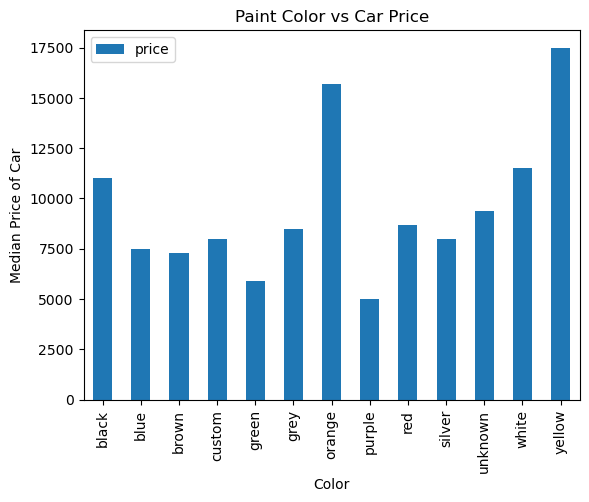

In [29]:
color.plot(
    kind='bar',
    x='paint_color',
    y='price',
    title='Paint Color vs Car Price',
    xlabel='Color',
    ylabel='Median Price of Car',
)

plt.show()

From the graph above it does seem like choosing a purple car may not be the best option if you hope to sell your car in the future.

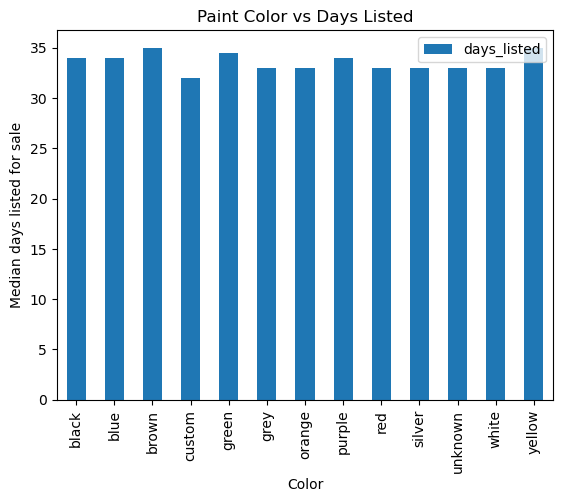

In [32]:
color.plot(
    kind='bar',
    x='paint_color',
    y='days_listed',
    title='Paint Color vs Days Listed',
    xlabel='Color',
    ylabel='Median days listed for sale',
)

plt.show()

Looks like despite the color of the car, they will all generally sell in about a month.

Lets make a manufacturer column so we can see the variation in price per each manufacturer.

In [12]:
cars['manufacturer'] = cars['model'].apply(lambda x: x.split()[0])

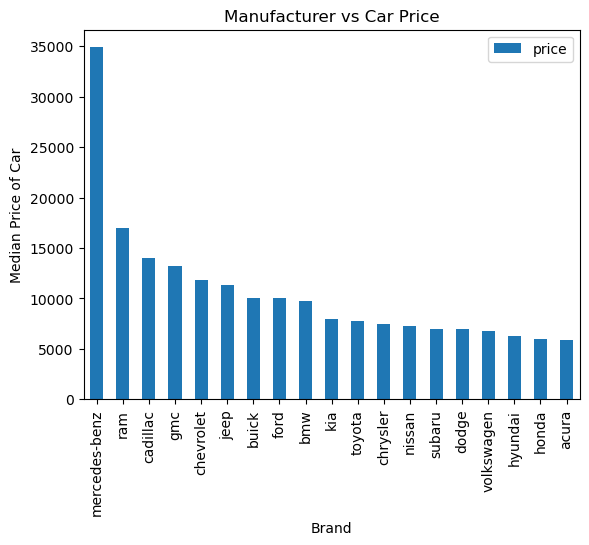

In [31]:
brands = cars.groupby('manufacturer').median().sort_values(by='price', ascending= False).drop({'model_year','cylinders','is_4wd','days_listed','odometer'}, axis='columns').reset_index()

brands.plot(
    kind='bar',
    x='manufacturer',
    y='price',
    title='Manufacturer vs Car Price',
    xlabel='Brand',
    ylabel='Median Price of Car',
)

plt.show()

# Conclusion

In conclusion, while the color of the car can influence the price of the vehicle somewhat, it is not a predictor on the time it takes to sell a car. The brand of the car alone can be a more suitable predictor of car price.

